In [430]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def single_axis(figsize=(8, 0.5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

    return fig, ax

# Floating-point arithmetic

* **Marijan Beg** and Navjot Kukreja 
* *Modern Programming Methods*, 25 October 2021

## How to find me?

* Marijan Beg
* email: m.beg@imperial.ac.uk
* GitHub: `@marijanbeg`
* MS Teams: `@Beg, Marijan`

## By the end of this lecture you should be able to:

* represent numbers in different number systems;
* read and write floating-point numbers according to IEEE-754 standard;
* understand and calculate round-off errors;
* apply "Theorem on loss of precision";
* use different techniques to reduce the loss of precision by subtraction.

## Representation of real numbers

- Every real number $x \in \mathbb{R}$ is a **point** on the real axis.

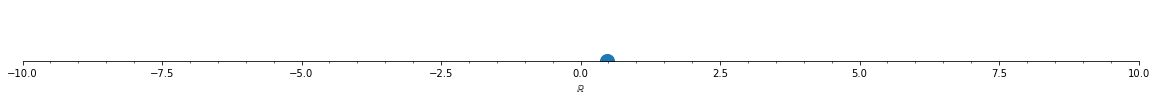

In [431]:
fig, ax = single_axis(figsize=(20, 1))
ax.set_xlim(-10, 10)
ax.set_ylim(0, 0.1)
ax.scatter(0.466, 0, s=200)
plt.xlabel('$\mathbb{R}$')
plt.show()

- How do we communicate them? How do we represent real numbers?

### Example: Decimal (base-10) representation

- $x = 28\,763.437$

- Integer part:
$$
\begin{split}
28\,763 & = 20\,000 + 8\,000 + 700 + 60 + 3 \\
        & = 2 \times 10^{4} + 8 \times 10^{3} + 7 \times 10^{2} + 6 \times 10^{1} + 3 \times 10^{0}
\end{split}
$$

- Fractional part:
$$
\begin{split}
0.437 & = \frac{4}{10} + \frac{3}{100} + \frac{7}{1\,000}\\
      & = 4 \times 10^{-1} + 3 \times 10^{-2} + 7 \times 10^{-3}
\end{split}
$$

In [432]:
x = 28763.437
x

28763.437

### General decimal (base-10) expression

$$
a_{n}a_{n-1}\ldots a_1 a_0 \, . \, b_{1} b_{2} b_{3} \ldots = \sum_{i=0}^{n} a_{i} \times 10^{i} + \sum_{i=1}^{\infty} b_{i} \times 10^{-i}
$$

- $a_{i}, b_{i} \in \mathbb{Z}_{10} = \{0, 1, 2, \ldots, 9\} \quad (0 \le a_{i}, b_{i} \le 9)$

| | |
| - | - |
| $a_{n}a_{n-1}\ldots a_1 a_0$ | integer part |
| $.$ | decimal point |
| $b_{1} b_{2} b_{3} \ldots$ | fractional part |

### Example: Binary (base-2) representation

$$x = (1\,011.101)_{2}$$

- **Note:** We write $(1\,011.101)_{2}$ to make sure we do not interpret the number as decimal (*one thousand and eleven point one zero one*)

- Integer part:
$$
\begin{split}
(1\,011)_{2} & = 1 \times 2^{3} + 0 \times 2^{2} + 1 \times 2^{1} + 1 \times 2^{0}\\
             & = (11)_{10}
\end{split}
$$

- Fractional part:
$$
\begin{split}
(0.101)_{10} & = \frac{1}{2} + \frac{0}{4} + \frac{1}{8}\\
             & = 1 \times 2^{-1} + 0 \times 2^{-2} + 1 \times 2^{-3}\\
             & = (0.625)_{10}
\end{split}
$$

How can we write binary numbers in Python?

```python
x = 0b1011.101
x

  File "/var/folders/lr/hsg067s53m3bw35fmxmfyb680000gn/T/ipykernel_72996/2192814046.py", line 1
    x = 0b1011.101
              ^
SyntaxError: invalid syntax
```

We can write integers in binary format:

In [433]:
x = 0b1011
x  # we get decimal as the output

11

### General binary (base-2) expression

$$
a_{n} a_{n-1}\ldots a_1 a_0 \, . \, b_{1} b_{2} b_{3} \ldots = \sum_{i=0}^{n} a_{i} \times 2^{i} + \sum_{i=1}^{\infty} b_{i} \times 2^{-i}
$$

- $a_{i}, b_{i} \in \mathbb{Z}_{2} = \{0, 1\} \quad (0 \le a_{i}, b_{i} \le 1)$

| | |
| - | - |
| $a_{n} a_{n-1}\ldots a_1 a_0$ | integer part |
| $.$ | radix point |
| $b_{1} b_{2} b_{3} \ldots$ | fractional part |

## Exercise 1

Write function `bin2dec(x2)` which takes a binary number $(x)_{2} = a_{n} a_{n-1}\ldots a_1 a_0 \, . \, b_{1} b_{2} b_{3} \ldots$ as a string (e.g. `'1011.101'`), computes its decimal equivalent $(x)_{10}$, and returns it as a float. Input string does not have to contain fractional part - radix point could be missing.

In [434]:
# My solution
# def bin2dec(x2):
#     # Write your code here.
#     string_list = x2.split('.')
    
#     if len(string_list) >1:
#         integer_part = int(string_list[0],2) if string_list[0] != '' else 0
#         fractional_part = int(string_list[1],2) / 2.**len(string_list[1])
#     else:
#         integer_part = int(string_list[0],2)
#         fractional_part = 0
        
#     x10 = float(integer_part + fractional_part)
#     return x10

In [435]:
# Sample solution
def bin2dec(x2): 
    if '.' in x2:
        integer, frac = x2.split('.')
    else:
        integer = x2
        frac = '0'

    s = 0
    counter = 0
    i = sum(int(digit) * (2**i) for i,digit in enumerate(reversed(integer)))
    f = sum(int(digit) * (2**-i) for i,digit in enumerate(frac,start=1))

    return i + f

In [436]:
assert bin2dec('110101') == 53
assert abs(bin2dec('.01101') - 0.40625) < 1e-10
assert abs(bin2dec('110101.01101') - 53.40625) < 1e-10

### General base-$\beta$ expression

$$
a_{n} a_{n-1}\ldots a_1 a_0 \, . \, b_{1} b_{2} b_{3} \ldots = \sum_{i=0}^{n} a_{i} \times \beta^{i} + \sum_{i=1}^{\infty} b_{i} \times \beta^{-i}
$$

- $\beta \in \{x \in \mathbb{N} | x > 1\}$
- $a_{i}, b_{i} \in \mathbb{Z}_{\beta} = \{0, \ldots, \beta-1\}$

| binary | decimal | octal | hexadecimal |
| -- | - | - | - |
| 1 | 1 | 1 | 1 |
| $\beta$ = 2 | $\beta$ = 10 | $\beta$ = 8 | $\beta$ = 16 |

- For $\beta > 10$, we need additional symbols for $d_{i} > 9$. For instance, in hexadecimal: $0, 1, 2, \ldots, 9, \mathrm{a}=10, \mathrm{b}=11, \mathrm{c}=12, \mathrm{d}=13, \mathrm{e}=14, \mathrm{f}=15$.

In [437]:
int('11111100101', base=2) == 0b11111100101 == 2021  # binary

True

In [438]:
int('7e5', base=16) == 0x7e5 == 2021  # hexadecimal

True

In [439]:
int('3745', base=8) == 0o3745 == 2021  # octal

True

## Base conversion

### Integer part

- We can write an integer $x$ in nested polynomial form:

$$
\begin{split}
x &= (c_{n}c_{n-1} \ldots c_{1}c_{0})_{\beta} \\
  &= \sum_{i=0}^{n} c_{i} \times \beta^{i} \\
  &= c_{0} + \beta(c_{1} + \beta (c_{2} + \beta (\ldots)))
\end{split}
$$

- Dividing $x$ by $\beta$ results in remainder $c_{0}$ and quotient $c_{1} + \beta (c_{2} + \beta (\ldots))$.
- By repeating the division we obtain digits $c_{0}$, $c_{1}$, $c_{2}$, etc.

### Fractional part

- A real number $x < 1$ in base-$\beta$ can be written as:
$$
\begin{split}
x &= \sum_{i=1}^{\infty}c_{i}\beta^{-i} \\
  &= (0.c_{1}c_{2}c_{3}\ldots)_{\beta}
\end{split}
$$

- If we multiply $x$ by $\beta$, we get:
$$
\beta x = (c_{1}.c_{2}c_{3}\ldots)_{\beta}
$$

- Digit $c_{1}$ we get by taking the integer part of $\beta x$.
- By repeating the multiplication by $\beta$ we obtain all decimal digits (if the number has a finite representation) or until we obtain enough significant digits.

## Exercise 2

Write function `dec2bin(x10, ndigits=10)` which takes a decimal real number $(x)_{10}$ as a float, computes its binary representation, and returns it as a string $a_{n} a_{n-1}\ldots a_1 a_0 \, . \, b_{1} b_{2} b_{3} \ldots$. The fractional part should not contain more than `ndigits`. Input real number `x10` does not have to contain both integer and fractional part.

In [440]:
def dec2bin(x10, ndigits=10):
    integer = abs(int(x10))
    frac = abs(x10) - integer
        
    x2 = ''
    while integer >=1 :
        remainder = int(integer)%2
        integer = int(integer)/2
        x2 += str(remainder)
        
    x2 = x2[::-1] if x10 >= 0 else '-'+x2[::-1]
    
    if frac != 0:
        x2 += '.'

        while ndigits:
            frac *= 2
            bit = int(frac)
            if bit == 1:
                x2 += '1'
                frac -= 1
            else:
                x2 += '0'
            ndigits -=1
            
    return x2

In [441]:
assert dec2bin(118.61328125, ndigits=8) == '1110110.10011101'
assert dec2bin(118) == '1110110'
assert dec2bin(0.61328125, ndigits=8) == '.10011101'

## Octal $\leftrightarrow{}$ binary

| octal | binary | octal | binary |
| - | - | - | - |
| 0 | 000 | 1 | 001 |
| 2 | 010 | 3 | 011 |
| 4 | 100 | 5 | 101 |
| 6 | 110 | 7 | 111 |

- Groups of three binary digits can be converted to a single octal digit (and vice versa):

$$
(364.23)_{8} = (\,011\,110\,100\,.\,010\,011\,)_{2}
$$

- Why?! Proof for a fractional part:

$$
\begin{split}
(0.b_{1}b_{2}b_{3}b_{4}b_{5}b_{6}\ldots) & = b_{1}2^{-1} + b_{2}2^{-2} + b_{3}2^{-3} + b_{4}2^{-4} + b_{5}2^{-5} + b_{6}2^{-6} + \ldots\\
& = (b_{1}2^{2} + b_{2}2^{1} + b_{3}2^{0})8^{-1} + (b_{4}2^{2} + b_{5}2^{1} + b_{6}2^{0})8^{-2} + \ldots
\end{split}
$$

- Because of the grouping, octal is often used as an intermediate step between binary-decimal conversion.

## Hexadecimal $\leftrightarrow{}$ binary

| hex | binary | hex | binary |
| - | - | - | - |
| 0 | 0000 | 1 | 0001 |
| 2 | 0010 | 3 | 0011 |
| 4 | 0100 | 5 | 0101 |
| 6 | 0110 | 7 | 0111 |
| 8 | 1000 | 9 | 1001 |
| a | 1010 | b | 1011 |
| c | 1100 | d | 1101 |
| e | 1110 | f | 1111 |

- Groups of four binary digits can be converted to a single hexadecimal digit (and vice versa):

$$
(\textrm{a2f.b4})_{8} = (\,1010\,0010\,1111\,.\,1011\,0100\,)_{2}
$$

## Exercise 3

Complete the following table

| decimal | binary | hexadecimal | octal |
| - | - | - | - |
| 2.65 |10.1010011001 |2.a6 |2.514 |
| 19.8125| 10011.1101 |13.d |23.64 |
|244.76953125 |11110100.11000101 | f4.c5 |364.612 |


In [442]:
# 2.65: b,h,o
print(dec2bin(2.65 ,ndigits=9))
print(dec2bin(2.65 ,ndigits=8))
print(oct(0b10))
print(oct(0b101001100))
print(hex(0b10))
print(hex(0b10100110))


# 10011.1101: d,h,o
# ...


# f4.c5: d,b,o
# hex_1 = str(bin(0xf4))[2:]
# hex_2 = str(bin(0xc5))[2:]
# hex_str = hex_1+'.'+hex_2
# print(bin2dec(hex_str))
# print(dec2bin(244.76953125 ,ndigits=9))
# print(oct(0b11110100))
# print(oct(0b110001010))

10.101001100
10.10100110
0o2
0o514
0x2
0xa6


## IEEE floating point standard (IEEE-754)

Let us say we want to write the following constants into memory:
* $e = 2.718281828459045\ldots$
* vacuum permeability: $\mu_{0} = 4\pi \times 10^{-7} \,\mathrm{NA}^{-2}$
* Planck's constant: $h = 6.626070040 \times 10^{−34} \,\mathrm{Js}$

In [443]:
dec2bin(np.e, ndigits=64)

'10.1011011111100001010100010110001010001010111011010010000000000000'

In [444]:
mu0 = 4 * np.pi * 1e-7  # N/A
dec2bin(mu0, ndigits=64)

'.0000000000000000000101010001010100110111000011111001100111110110'

In [445]:
h = 6.626070040e-34  # Js
dec2bin(h, ndigits=64)

'.0000000000000000000000000000000000000000000000000000000000000000'

### Scientific notation

- We usually write integer part and fractional part together with a (decimal/radix) point in between.
- On the other hand, we can also write:

$$
\begin{split}
37541.23 &= 37.54123 \times 10^{3}\\ 
         &= 3.754123 \times 10^{4}\\
         &= 0.3754123 \times 10^{5}
\end{split}
$$

- This representation is *not unique*.

### Normalised scientific notation

- To ensure uniqueness, we introduce normalised scientific notation:

$$x = 0.d_{1}d_{2}d_{3}\ldots \times 10^{e}, \quad d_{1} \ne 0$$

- Leading digit in the fractional part is not zero (except when the number is zero):

$$37541.23 = 0.3754123 \times 10^{5}$$

$$0.009765 = 0.9765 \times 10^{-2}$$

### Normalised scientific notation in decimal form

Any $x \in \{x \in \mathbb{R} | x \ne 0\}$ can be written as:

$$
x = \pm m \times 10^{e}, \quad \frac{1}{10} \le m < 1
$$

| label | name |
| - | - |
| $\pm$ | sign
| $m$ | mantissa |
| $e$ | exponent |

$$
m = \pm 0.d_{1}d_{2}d_{3}\ldots, \quad d_{1} \ne 0, \; d_{i} \in \mathbb{Z}_{10},
$$

### Normalised scientific notation in binary form

Any $x \in \{x \in \mathbb{R} | x \ne 0\}$ can be written as:

$$
x = \pm m \times 2^{e}, \quad \frac{1}{2} \le m < 1
$$

| label | name |
| - | - |
| $\pm$ | sign
| $m$ | mantissa |
| $e$ | exponent |

$$
m = \pm 0.b_{1}b_{2}b_{3}\ldots, \quad b_{1} = 1, \; b_{i} \in \{0, 1\}.
$$

### Floating-point representation

$$
x = \pm m \times 2^{e}, \quad \frac{1}{2} \le m < 1
$$

- We need to save the sign ($\pm$), mantissa ($m$), and exponent ($e$) separatately.
- Every computer has a finite word length
    - We cannot exactly represent:
        - irrational numbers, e.g. $\pi$, $\mathrm{e}$, ...,
        - rational numbers that do not fit the finite form, e.g. $\frac{1}{3}$.
    - A disrete set of numbers that are exactly representable are called **machine numbers**.
    - A number with a terminating expansion in one base might have a non-terminating expansion in another base, e.g.
    
    $$(0.1)_{10} = (0.0001100110011001100110011001100110011001100110011\ldots)_{2}$$

## Exercise 4

Let us assume we have a machine that represents floating-point numbers using the following representation:

$$x = \pm(0.b_{1}b_{2}b_{3})_{2} \times 2^{e}, \quad b_{1}, b_{2}, b_{3}, e \in \{0, 1\}$$

1. How many machine numbers are there? What are they?
2. How do the machine numbers change if we enforce normalisation?

In [446]:
import itertools

def compute_decimal_bits(sign,b1,b2,b3,exp):
    mantissa = b1 * 2 ** -1 + b2 * 2 ** -2 + b3 * 2 ** -3
    return  -1** sign * mantissa * 2**exp

machine_numbers = [compute_decimal_bits(*bits) for bits in itertools.product(*[(0,1) for _ in range(5)])]
print(f' machine numbers: {machine_numbers}')

# ?

 machine numbers: [-0.0, -0.0, -0.125, -0.25, -0.25, -0.5, -0.375, -0.75, -0.5, -1.0, -0.625, -1.25, -0.75, -1.5, -0.875, -1.75, -0.0, -0.0, -0.125, -0.25, -0.25, -0.5, -0.375, -0.75, -0.5, -1.0, -0.625, -1.25, -0.75, -1.5, -0.875, -1.75]


- Larger numbers result in overflow.
    - Overflow could be handled differently.
- Smaller numbers result in underflow - commonly rounded to zero.
- Most numbers cannot be represented exactly.

## IEEE-754

- In early 1980s, IEEE (Institute of Electrical and Electronics Engineers) established floating-point standard (IEEE-754).
- Before the standard, computer manufacturers developed their own floating-point number systems.
    - There were inconsistencies in results between different machines.
- There are three common levels of precison:

| precision   | bits | sign | exponent | mantissa |
| ----------- | ---- | ---- | -------- | -------- |
| single      | 32   | 1    | 8        | 23       |
| double      | 64   | 1    | 11       | 52       |
| long double | 80   | 1    | 15       | 64       |

- As computational scientists, we do not need to know all the details, but we need to understand it.

### Single precision (32 bit)

$$x = (-1)^{s} \times 2^{e-127} \times (1 + 0.f)_{2}$$

- 1 bit for the sign $s$
    - $s=0$ - postitive
    - $s=1$ - negative
    
- 8 bits for the exponent $e$
    - $0 < e < (11\,111\,111)_{2} = 255$ (values $0$ and $255$ are reserved for $\pm 0$ and $\pm \infty$).
    - We shift $e$ by 127 to allow representing values around zero:
    $$-126 \le e-127 \le 127$$
    
    
- 23 bits for the matissa (significand) $f$
    - *one-plus form* ($1 + 0.f$) to ensure normalisation
        - It actually corresponds to 24 bits because there is a **hidden bit**.
    - Mantissa is limited by:
    $$(1.00000000000000000000000)_{2} = 1 \le (1.f)_{2} \le (1.11111111111111111111111)_{2} = 2 - 2^{-23}$$
    
- Largest number: $(2-2^{-23}) \times 2^{127} \approx 2^{128} \approx 3.4 \times 10^{38}$
- Smallest positive number: $1 \times 2^{-126} \approx 1.17 \times 10^{-38}$

### Machine $\epsilon$, precision, and resolution

- The number of real numbers $x$ we can represent is finite.
- The floating-point machine number corresponding to $x$, we denote as $\mathrm{fl}(x)$.
- Machine $\epsilon$ is the smallest number such that:
$$\mathrm{fl}(1 + \epsilon) \ne 1$$
- For single precision, the machine $\epsilon$ is:

$$\epsilon = (1.00000000000000000000001)_{2} - (1.00000000000000000000000)_{2} = 2^{-23} \approx 1.19 \times 10^{-7}$$

- **Precision:** Because $\epsilon = \approx 1.19 \times 10^{-7}$, we can rely on approximately 6 accurate decimal digits. We say that the precision is 6.
$$\pi_\mathrm{single} = 3.14159$$
- **Resolution:** Sometimes, instead of precision $p$, we show **resolution**: $10^{-p} = 10^{-6}$.

In [447]:
import numpy as np

single = np.finfo(np.float32)

print(f'Single precision float')
print(25*'-')
print(f'Total size in bits: {single.bits}')
print(f'Bits in mantissa: {single.nmant}')
print(f'Bits in exponent: {single.nexp}')
print(f'Machine epsilon: {single.eps}')
print(f'Largest number: {single.max}')
print(f'Smallest number: {single.min}')
print(f'Smallest positive number: {single.tiny}')
print(f'Precision: {single.precision}')
print(f'Resolution: {single.resolution}')

Single precision float
-------------------------
Total size in bits: 32
Bits in mantissa: 23
Bits in exponent: 8
Machine epsilon: 1.1920928955078125e-07
Largest number: 3.4028234663852886e+38
Smallest number: -3.4028234663852886e+38
Smallest positive number: 1.1754943508222875e-38
Precision: 6
Resolution: 9.999999974752427e-07


### Double precision (64 bit)

$$x = (-1)^{s} \times 2^{e-1023} \times (1 + 0.f)_{2}$$

- 1 bit for the sign $s$
    - $s=0$ - postitive
    - $s=1$ - negative
    
- 11 bits for the exponent $e$
    - $0 < e < (11\,111\,111\,111)_{2} = 2047$ (values $0$ and $2047$ are reserved for $\pm 0$ and $\pm \infty$)
    - $-1022 \le e - 1023 \le 1023$
 
- 52 bits for mantissa $f$
    - *one-plus form* ($1 + 0.f$) to ensure normalisation
        - It actually corresponds to 53 bits because there is a **hidden bit**.
    - Mantissa is limited by:
    $$(1.00\ldots 00)_{2} = 1 \le (1.f)_{2} \le (1.11\ldots 11)_{2} = 2 - 2^{-52}$$

- Largest number: $(2 - 2^{-52}) \times 2^{1023} \approx 2^{1024} \approx 1.8 \times 10^{308}$
- Smallest positive number: $1 \times 2^{-1022} \approx 2.2 \times 10^{-308}$

### Double precision: machine $\epsilon$, precision, and resolution

- Machine $\epsilon$:

$$\epsilon = 2^{-52} \approx 2.22 \times 10^{-16}$$

- Precision: We can rely on approximately 15 accurate decimal digits.
$$\pi_\mathrm{double} = 3.14159265358979$$
- Resolution: $10^{-p} = 10^{-15}$.

In [448]:
double = np.finfo(np.float64)

print(f'Single precision float')
print(25*'-')
print(f'Total size in bits: {double.bits}')
print(f'Bits in mantissa: {double.nmant}')
print(f'Bits in exponent: {double.nexp}')
print(f'Machine epsilon: {double.eps}')
print(f'Largest number: {double.max}')
print(f'Smallest number: {double.min}')
print(f'Smallest positive number: {double.tiny}')
print(f'Precision: {double.precision}')
print(f'Resolution: {double.resolution}')

Single precision float
-------------------------
Total size in bits: 64
Bits in mantissa: 52
Bits in exponent: 11
Machine epsilon: 2.220446049250313e-16
Largest number: 1.7976931348623157e+308
Smallest number: -1.7976931348623157e+308
Smallest positive number: 2.2250738585072014e-308
Precision: 15
Resolution: 1e-15


## Exercise 5

Determine machine representation of the decimal number -24.98746 in both single and double precision.

In [449]:
dec2bin(-24.98746, ndigits=40)

'-11000.1111110011001010001011011011011000011011'

In [473]:
def single_precision(f,sign):
    if '.' in f:
        exp = f.find('.') - 1
        f = f.replace('.','')
        f = f[0:1] + '.' + f[1:24]
    else:
        exp = len(f) -1
        f = f[0:1] + '.' + f[1:24]
        
    return (-1)**sign * 2 ** exp * bin2dec(f)

def double_precision(f,sign):
    if '.' in f:
        exp = f.find('.') - 1
        f = f.replace('.','')
        f = f[0:1] + '.' + f[1:53]
    else:
        exp = len(f) -1
        f = f[0:1] + '.' + f[1:53]
        
    return (-1)**sign * 2 ** exp * bin2dec(f)
    


f = dec2bin(24.98746,100)

s = single_precision(f=f,sign = 1)
print(s)

d = double_precision(f=f,sign = 1)
print(d)

-24.987459182739258
-24.98746


## Exercise 6

What decimal floating-point number corresponds to $(abcd1234)_{16}$ according to IEEE-754?

In [474]:
hex_val = dec2bin(int('abcd1234',16))
print(single_precision(f=hex_val,sign=0)) # IEEE-754 single precision
print(double_precision(f=hex_val,sign=0)) # IEEE-754 double precision

2882343424.0
2882343476.0


### Overflow and underflow

- How can we represent $x = 2^{68426539}$ or $x = 2^{-98723640}$?
    -  We cannot. This attempt results in overflow or underflow.
- Underflow is often rounded to zero.
- Overflow is handled differently by different systems.

In [425]:
huuuuuuge = 1e73642834
supersupersmall = 1e-73642834
print(f'{huuuuuuge=}')
print(f'{supersupersmall=}')

huuuuuuge=inf
supersupersmall=0.0


## Chopping and rounding

- For simplicity, here, we assume single precision floating-point numbers.
- Let us say we want to represent $x$ with its nearest machine number $\mathrm{fl}(x)$:

$$x = (0.1b_{1}b_{2}b_{3}b_{4}\ldots)_{2} \times 2^{m}$$
$$\mathrm{fl}(x) = q \times 2^{m}, \frac{1}{2} \le q < 1, -125 \le m \le 128$$

- How large can be the error?

- **Chopping:** We can chop excess bits $b_{25}b_{26}\ldots$ and the machine number is then:

$$x_{-} = (0.1b_{2}b_{3}b_{4}\ldots b_{24})_{2} \times 2^{m}$$

- **Rounding:** $x_{+}$ is just to the right and it is obtained by rounding up. We add one unit to $b_{24}$.

$$x_{+} = [(0.1b_{2}b_{3}b_{4}\ldots b_{24})_{2} + 2^{-24}] \times 2^{m}$$

- We now choose the number which is closer to $x$ as its machine representation $\mathrm{fl}(x)$.

### Absolute and relative error

- **Absolute error**:

$$|x - \mathrm{fl}(x)| \le \frac{1}{2}|x_{+} - x_{-}| = \frac{1}{2} \times 2^{-24} \times 2^{m} = 2^{-25+m}$$

- **Relative error**:

$$\frac{|x - \mathrm{fl}(x)|}{|x|} \le \frac{2^{-25 + m}}{(0.1b_{1}b_{2}b_{3}\ldots)_{2} \times 2^{m}} \le \frac{2^{-25}}{1/2} = 2^{-24} = u$$

- $u$ is the **unit round-off error**.
    - It is $2^{-k}$ where $k$ is the number of bits in matissa plus the hidden bit.

## Floating-point arithmetic

### Floating-point addition

$$8.70 \times 10^{-1} + 9.95 \times 10^{1} = \,?$$

1. Rewrite the smaller number such that its exponent matches the exponent of the larger number.

$$8.70 \times 10^{-1} = 0.087 \times 10^{1}$$

2. Add the mantissas:

$$9.95 + 0.087 = 10.037,$$

3. Normalise result and check for overflow/underflow of the exponent after normalisation.

$$10.037 \times 10^1 = 1.0037 \times 10^2$$

4. Check for overflow/underflow of the exponent after normalisation.

    - All good :)

5. Round the result.

    - If the mantissa does not fit in the space reserved for it, it has to be rounded off. For example: If only 4 digits are allowed for mantissa:

$$1.0037 \times 10^2 \rightarrow 1.004 \times 10^2$$

### Floating Point Multiplication

Multiply the following two numbers in scientific notation by hand:

$$1.110 \times 10^{10} \times 9.200 \times 10^{-5}$$

Add the exponents to find
- New exponent $= 10 + (-5) = 5$

If we add biased exponents, bias will be added twice. Therefore we need to subtract it once to compensate:
$$(10 + 127) + (-5 + 127) = 259$$

$259 - 127 = 132$ which is $(5 + 127) =$ biased new exponent

Multiply the mantissas
$$1.110 \times 9.200 = 10.212000$$

Can only keep three digits to the right of the decimal point, so the result is

$$10.212 \times 10^5$$

Normalize the result
$$1.0212 \times 10^6$$

Round it
$$1.021 \times 10^6$$

## Error in arithmetic operations

- For any $x \in \mathbb{R}$ within the range of the computer:

$$\frac{|x - \mathrm{fl}(x)|}{x} \le u$$

$$\mathrm{fl}(x) = x(1 + \delta), \quad |\delta| \le u$$

- If $\odot$ is any operation ($+, -, \times, /$), and we assume that $x \odot y$ is correctly computed, normalised, and finally rounded:

$$\mathrm{fl}(x \odot y) = (x \odot y)(1 + \delta)$$

- More precisely:

$$\mathrm{fl}(\mathrm{fl}(x) \odot \mathrm{fl}(y))$$

## Loss of significance

- Let us say we need to subtract two nearly equal numbers in a machine with only 5 decimal digits of accuracy:

$$x = 0.8796421358 \quad y = 0.8795374261$$

What is the relative error?

In [426]:
x = 0.8796421358
y = 0.8796354261
correct = x - y  # is it correct?

# Round to 5 decimal digits
x_round = round(x, 6)
y_round = round(y, 6)
computed = round(x_round - y_round, 5)

absolute = abs(correct - computed)
relative = absolute / abs(correct)

print(f'"Correct" solution: {correct}')
print(f'Correct solution: {correct:0.9f}')
print(f'Computed solution: {computed}')
print(f'Relative error is: {relative*100:.2f}%.')

"Correct" solution: 6.709699999940533e-06
Correct solution: 0.000006710
Computed solution: 1e-05
Relative error is: 49.04%.


### Theorem of loss of precision

- How many significant binary digits are lost in $x - y$ when $x$ is close to $y$?

- **Theorem:** Let $x$ and $y$ be normalised floating-point machine numbers, where $x > y > 0$. If $2^{-p} \le 1 - \frac{x}{y} \le 2^{-q}$ for some positive integers $p$ and $q$, then at most $p$ and at least $q$ significant binary bits are lost in the subtraction $x - y$.

## Exercise 7

By applying the theorem of loss of precision, compute how many significant digits are lost in subtraction $x-y$. 

$$x = 0.8796421358 \quad y = 0.8795374261$$

In [488]:
x = 0.8796421358
y = 0.8795374261
# x > y

# Round to 4 decimal digits
x_round = round(x, 5)
y_round = round(y, 5)
computed = round(1-(x_round/y_round), 4)

print(x_round,y_round,computed)

print(x/y)

# ? 

0.00010470969999998303
0.87964 0.87954 -0.0001
1.000119050874804


## Avoiding loss of significance by subtraction

1. $f(x) = \sqrt{x^{2} + 1} - 1$

For $x \approx 0$, $\sqrt{x^{2} + 1} \approx 1$  we are in trouble! How can we remove this subtraction? By rationalisation.

$$
f(x) = (\sqrt{x^{2} + 1} - 1) \frac{\sqrt{x^{2} + 1} + 1}{\sqrt{x^{2} + 1} + 1} = \frac{x^{2}}{\sqrt{x^{2} + 1} + 1}
$$

2. $f(x) = x - \sin(x)$

We have an issue for $x \approx 0$. We can use Taylor explansion:

$$f(x) = x - \left(x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!} + \ldots\right) = \frac{x^{3}}{3!} - \frac{x^{5}}{5!} + \frac{x^{7}}{7!} + \ldots$$

## Exercise 8

For what values of $x$, could the loss of significance by subtraction occur. What could you do to prevent this?

1. $f(x) = \cos^{2}(x) - \sin^{2}(x)$
2. $f(x) = \ln(x) - 1$

In [ ]:
# 1
# for x -> 45 degree, cosx - sinx -> 0 
# solution: (cos(x) + sin(x))*(cos(x) - sin(x)) ==> cos(2x), just calculate cos(2x)
# 2
# for x -> e, ln(x) - 1 -> 0
# eˆ(ln(x) - 1) ==> e^ln(x)/e ==> x/e
# ln(x/e)

## Why is `x == y` bad?

In [185]:
x = np.float64(1)
y = np.float64(1/3)

assert x == 3*y

In [186]:
x = np.float32(1)
y = np.float32(1/3)

assert x == 3*y

AssertionError: 

In [187]:
assert 0.1 + 0.2 == 0.3

AssertionError: 

For comparison of floating-point numbers, we use `np.isclose`.

In [188]:
assert np.isclose(x, 3*y)

## Further resources

* <div class="csl-entry">IEEE ComputerSociety. (2019). <i>754-2019 - IEEE Standard for Floating-Point Arithmetic</i>. IEEE.</div> URL: https://standards.ieee.org/standard/754-2019.html
* <div class="csl-entry">Goldberg, D. (1991). What every computer scientist should know about floating-point arithmetic. <i>ACM Computing Surveys</i>, <i>23</i>(1), 5–48.</div> URL: https://doi.org/10.1145/103162.103163
* <div class="csl-entry">Overton, M. L. (2001). <i>Numerical Computing with IEEE Floating Point Arithmetic</i>. Society for Industrial and Applied Mathematics. URL: https://doi.org/10.1137/1.9780898718072</div>
* R. Burden, J. Faires, A. M. Burden. Numerical Analysis. Brooks Cole, 10th edition (2015).
* W. Cheney and D. Kincaid. Numerical Mathematics and Computing.  Wadsworth Publishing Co Inc, 7th edition (2012).